Number of CPU threads: 2
Num Threads     Execution Time (seconds)
1               107.083        
2               100.885        


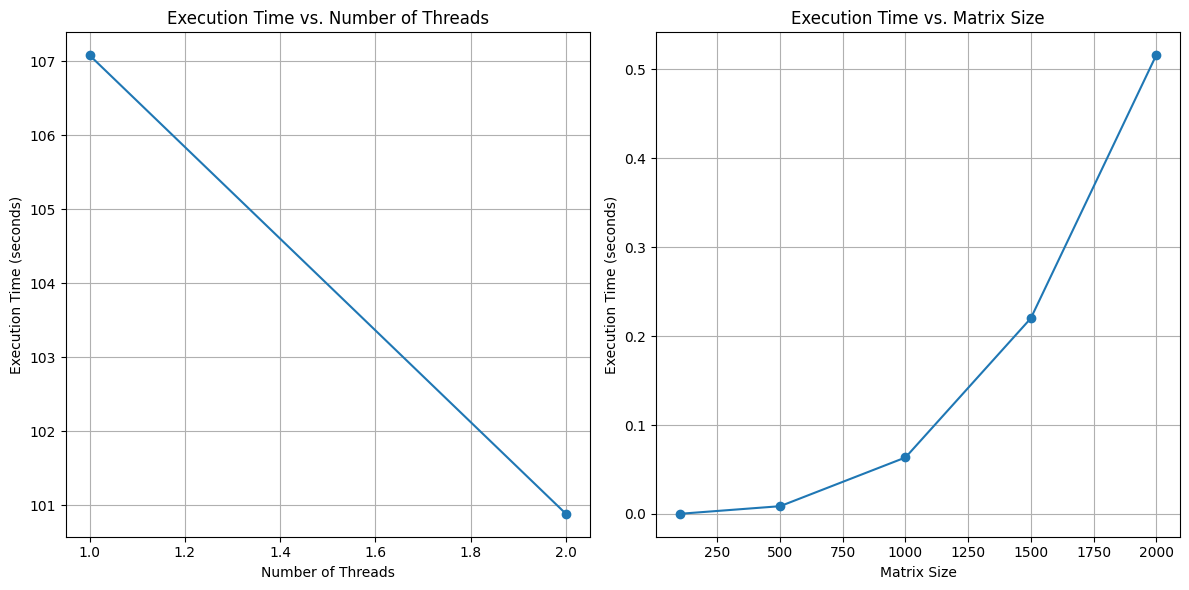

In [2]:
import threading
import numpy as np
import time
import matplotlib.pyplot as plt
import os

# Function to perform matrix multiplication
def multiply_matrices(result, constant_matrix):
    start_time = time.time()
    result_matrix = np.dot(result, constant_matrix)
    end_time = time.time() - start_time
    return end_time

# Generate random matrices
num_matrices = 100
matrix_sizes = [100, 500, 1000, 1500, 2000]

# Number of threads to use
activeThreads = os.cpu_count() # Get the number of CPU threads

# Lists to store data for plotting
num_threads_list = []
execution_time_list = []

# Perform matrix multiplication with different number of threads
print("Number of CPU threads:", activeThreads)
print("{:<15} {:<15}".format("Num Threads", "Execution Time (seconds)"))
for num_threads in range(1, activeThreads + 1):
    threads = []
    start_time = time.time()
    for size in matrix_sizes:
        constant_matrix = np.random.rand(size, size)
        for _ in range(num_matrices):
            result_matrix = np.random.rand(size, size)
            thread = threading.Thread(target=multiply_matrices, args=(result_matrix, constant_matrix))
            threads.append(thread)
            thread.start()

    # Wait for all threads to finish
    for thread in threads:
        thread.join()

    end_time = time.time() - start_time

    # Store data for plotting
    num_threads_list.append(num_threads)
    execution_time_list.append(end_time)

    # Print results in tabular format
    print("{:<15} {:<15.3f}".format(num_threads, end_time))

# Plot execution time vs. number of threads
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(num_threads_list, execution_time_list, marker='o')
plt.title('Execution Time vs. Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)

# Additional graphs
# Plot execution time for different matrix sizes
execution_times = []
for size in matrix_sizes:
    constant_matrix = np.random.rand(size, size)
    execution_time = multiply_matrices(np.random.rand(size, size), constant_matrix)
    execution_times.append(execution_time)

plt.subplot(1, 2, 2)
plt.plot(matrix_sizes, execution_times, marker='o')
plt.title('Execution Time vs. Matrix Size')
plt.xlabel('Matrix Size')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()